# Part A - Classifying Merchants

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Step1 - Data Preparation

In [65]:
#Loading the data set
df = pd.read_csv('merchant_data.csv')
df.head()

,Unnamed: 0,merchant,time,amount_usd_in_cents
0,1,faa029c6b0,2034-06-17 23:34:14,6349
1,2,ed7a7d91aa,2034-12-27 00:40:38,3854
2,3,5608f200cf,2034-04-30 01:29:42,789
3,4,15b1a0d61e,2034-09-16 01:06:23,4452
4,5,4770051790,2034-07-22 16:21:42,20203


In [66]:
#Dropping the Unnamed column
df = df.drop(columns="Unnamed: 0")
#Converting cents to dollars
df["amount_usd"] = df["amount_usd_in_cents"]/100
df = df.drop(columns="amount_usd_in_cents")
#Converting the transaction time column to appropriate type for use
df["time"] = pd.to_datetime(df["time"])
df = df.sort_values("time").reset_index(drop=True)
df.head()

,merchant,time,amount_usd
0,3e72388b82,2033-01-01 09:38:32,43.35
1,32cd721943,2033-01-01 12:53:52,60.19
2,a8ff2d667e,2033-01-01 15:08:55,39.42
3,cad5cd6286,2033-01-01 15:16:32,19.26
4,878047f4b9,2033-01-01 15:19:16,48.39


In [67]:
#Exploring the data
df.iloc[-1,1] - df.iloc[0,1]
df.merchant.nunique()

14351

### Step2 - Analyzing the count and average transaction value of each merchant

In [68]:
df2 = df.groupby(["merchant"],as_index=False)["amount_usd"].agg(["sum", "min", "max", "count" ,"mean", "median"]).reset_index()
df2.sort_values("mean",ascending=False)
df2.head()

,merchant,sum,min,max,count,mean,median
0,0002b63b92,33.79,33.79,33.79,1,33.790000,33.790
1,0002d07bba,892.78,20.57,438.42,4,223.195000,216.895
2,00057d4302,295.21,6.05,40.73,28,10.543214,7.520
3,000bcff341,78.26,78.26,78.26,1,78.260000,78.260
4,000ddbf0ca,102.99,102.99,102.99,1,102.990000,102.990


In [69]:
df2["diff_mean_median"] = df2["mean"] - df2["median"]
df2.sort_values("diff_mean_median",ascending=False)

,merchant,sum,min,max,count,mean,median,diff_mean_median
459,0838e4078e,263459.53,2063.00,259202.80,3,87819.843333,2193.730,85626.113333
291,0517835bfd,71681.88,1321.69,56817.64,4,17920.470000,6771.275,11149.195000
4981,59a62facad,70876.88,59.22,28986.52,9,7875.208889,302.530,7572.678889
2156,26f51e4c7e,110520.25,1466.15,67962.85,4,27630.062500,20545.625,7084.437500
484,08c263b417,40103.11,922.02,34600.85,5,8020.622000,946.690,7073.932000
...,...,...,...,...,...,...,...,...
9754,ae57962b1c,36194.48,208.48,5843.19,9,4021.608889,5377.490,-1355.881111
6056,6d13e895f8,24348.17,259.34,6661.74,5,4869.634000,6232.980,-1363.346000
9085,a1d4e003ec,43878.87,1989.84,7195.14,9,4875.430000,6287.820,-1412.390000
5478,62b94ab15f,15696.06,1605.43,7371.28,3,5232.020000,6719.350,-1487.330000


<function matplotlib.pyplot.show(close=None, block=None)>

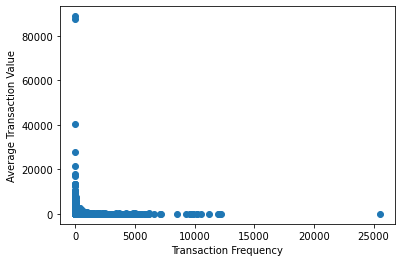

In [70]:
#Making an assumption here that below two merchants are not outliers as the other neighbouring values are also in the similar range of count and amount spent
plt.scatter(df2['count'], df2['mean'])
plt.xlabel('Transaction Frequency')
plt.ylabel('Average Transaction Value')
plt.show


In [71]:
df.loc[df["merchant"]=="b993083163"]

,merchant,time,amount_usd
1100558,b993083163,2034-09-21 19:45:34,86093.80
1120031,b993083163,2034-09-27 12:53:21,79114.88
1145120,b993083163,2034-10-04 01:00:02,85319.07
1189623,b993083163,2034-10-16 17:02:54,85319.07
1190699,b993083163,2034-10-16 21:29:24,103855.08
1499241,b993083163,2034-12-27 17:40:06,93546.01


In [72]:
df2.sort_values("count",ascending=False)
df.loc[df["merchant"]=="5608f200cf"].sort_values("time")

,merchant,time,amount_usd
42816,5608f200cf,2033-03-29 21:21:57,8.20
49284,5608f200cf,2033-04-09 19:52:45,3.82
49529,5608f200cf,2033-04-10 02:23:28,4.38
49899,5608f200cf,2033-04-11 00:00:52,8.20
49925,5608f200cf,2033-04-11 00:45:22,8.20
...,...,...,...
1512534,5608f200cf,2034-12-31 00:27:43,8.20
1512617,5608f200cf,2034-12-31 00:49:12,8.20
1512750,5608f200cf,2034-12-31 01:16:10,8.20
1512854,5608f200cf,2034-12-31 01:41:11,8.20


### Step3 - Creating categories for amount and frequency

In [73]:
df2["count"].describe()

count    14351.000000
mean       105.478294
std        527.717966
min          1.000000
25%          3.000000
50%         11.000000
75%         45.000000
max      25512.000000
Name: count, dtype: float64

In [74]:
df2.loc[(df2["count"]>=1) & (df2["count"]<=100)].sort_values("count")

,merchant,sum,min,max,count,mean,median,diff_mean_median
0,0002b63b92,33.79,33.79,33.79,1,33.7900,33.790,0.0000
5459,6273dce4de,566.98,566.98,566.98,1,566.9800,566.980,0.0000
5473,62ab94e39e,106.13,106.13,106.13,1,106.1300,106.130,0.0000
5476,62b10578df,9533.85,9533.85,9533.85,1,9533.8500,9533.850,0.0000
5490,62fadb655e,2.47,2.47,2.47,1,2.4700,2.470,0.0000
...,...,...,...,...,...,...,...,...
1891,2218d4d6a9,8936.64,29.22,388.56,100,89.3664,69.710,19.6564
10063,b41019846b,21697.28,9.00,2648.82,100,216.9728,88.770,128.2028
6440,73ad8f3e03,10333.81,15.16,254.97,100,103.3381,110.935,-7.5969
2399,2b6029b184,2099.23,17.68,48.45,100,20.9923,19.440,1.5523


In [75]:
df2["mean"].describe()

count    14351.000000
mean       381.045794
std       1415.186160
min          2.010000
25%         57.381817
50%        109.650000
75%        273.212222
max      88874.651667
Name: mean, dtype: float64

In [76]:
df2.loc[(df2["mean"]>=1) & (df2["mean"]<=500)].sort_values("mean")

,merchant,sum,min,max,count,mean,median,diff_mean_median
7370,83c1813b63,2.01,2.01,2.01,1,2.010000,2.010,0.000000
12354,dcc0c1c755,4.12,2.06,2.06,2,2.060000,2.060,0.000000
14259,fe9bf14103,2.09,2.09,2.09,1,2.090000,2.090,0.000000
8609,9963a11d63,6.52,2.12,2.28,3,2.173333,2.120,0.053333
6421,7347d3b20c,4.36,2.09,2.27,2,2.180000,2.180,0.000000
...,...,...,...,...,...,...,...,...
7492,85d9410c18,24433.15,13.33,2336.69,49,498.635714,456.550,42.085714
43,00ce0e442c,6988.89,425.83,926.19,14,499.206429,465.450,33.756429
368,0673ba122d,18974.43,2.35,1165.57,38,499.327105,515.455,-16.127895
11433,ccad56a070,2496.88,375.69,609.51,5,499.376000,566.460,-67.084000


In [77]:
df2["median"].describe()

count    14351.000000
mean       315.215175
std       1134.405473
min          2.010000
25%         45.145000
50%         82.705000
75%        201.375000
max      85706.435000
Name: median, dtype: float64

In [78]:
df2.loc[(df2["median"]>=5000) & (df2["median"]<=85706)].sort_values("median")

,merchant,sum,min,max,count,mean,median,diff_mean_median
142,02a42d9d45,58329.93,58.58,7117.79,14,4166.423571,5038.775,-872.351429
1332,17a38bda07,5040.56,5040.56,5040.56,1,5040.560000,5040.560,0.000000
3705,425094747a,37670.78,4270.03,7783.21,7,5381.540000,5051.780,329.760000
11312,ca7db8e192,20211.41,5040.98,5056.81,4,5052.852500,5056.810,-3.957500
8754,9bd35c4486,10121.32,551.80,9569.52,2,5060.660000,5060.660,0.000000
...,...,...,...,...,...,...,...,...
11354,cb2d925940,13363.59,13363.59,13363.59,1,13363.590000,13363.590,0.000000
4384,4e5d7ec3de,86595.03,6136.44,47836.07,4,21648.757500,16311.260,5337.497500
9948,b21191d3aa,51494.25,14451.85,20097.92,3,17164.750000,16944.480,220.270000
2156,26f51e4c7e,110520.25,1466.15,67962.85,4,27630.062500,20545.625,7084.437500


In [79]:
df2["Merch_Type"] = "Val"
for i, row in df2.iterrows():
    if (0 < row["count"] <= 500) & (0 < row["mean"] <= 500):
        df2.loc[i,"Merch_Type"] = "Low_Freq_Low_Value"
    elif (0 < row["count"] <= 500) & (500 < row["mean"] <= 5000):
        df2.loc[i,"Merch_Type"] = "Low_Freq_Med_Value"
    elif (0 < row["count"] <= 500) & (row["mean"] >= 5000):
        df2.loc[i,"Merch_Type"] = "Low_Freq_High_Value"
    elif (500 < row["count"] <= 1000) & (0 < row["mean"] <= 500):
        df2.loc[i,"Merch_Type"] = "Med_Freq_Low_Value"
    elif (500 < row["count"] <= 1000) & (500 < row["mean"] <= 5000):
        df2.loc[i,"Merch_Type"] = "Med_Freq_Med_Value"
    elif (500 < row["count"] <= 1000) & (row["mean"] >= 5000):
        df2.loc[i,"Merch_Type"] = "Med_Freq_High_Value"    
    elif (row["count"] >= 1000) & (0 < row["mean"] <= 500):
        df2.loc[i,"Merch_Type"] = "High_Freq_Low_Value"  
    elif (row["count"] >= 1000) & (0 < row["mean"] <= 5000):
        df2.loc[i,"Merch_Type"] = "High_Freq_Med_Value" 
    elif (row["count"] >= 1000) & (row["mean"] >= 5000):
        df2.loc[i,"Merch_Type"] = "High_Freq_High_Value" 
    else:
        pass
df2.sort_values("mean")

,merchant,sum,min,max,count,mean,median,diff_mean_median,Merch_Type
7370,83c1813b63,2.01,2.01,2.01,1,2.010000,2.010,0.000000,Low_Freq_Low_Value
12354,dcc0c1c755,4.12,2.06,2.06,2,2.060000,2.060,0.000000,Low_Freq_Low_Value
14259,fe9bf14103,2.09,2.09,2.09,1,2.090000,2.090,0.000000,Low_Freq_Low_Value
8609,9963a11d63,6.52,2.12,2.28,3,2.173333,2.120,0.053333,Low_Freq_Low_Value
6421,7347d3b20c,4.36,2.09,2.27,2,2.180000,2.180,0.000000,Low_Freq_Low_Value
...,...,...,...,...,...,...,...,...,...
4384,4e5d7ec3de,86595.03,6136.44,47836.07,4,21648.757500,16311.260,5337.497500,Low_Freq_High_Value
2156,26f51e4c7e,110520.25,1466.15,67962.85,4,27630.062500,20545.625,7084.437500,Low_Freq_High_Value
3694,42229128c1,40475.21,40475.21,40475.21,1,40475.210000,40475.210,0.000000,Low_Freq_High_Value
459,0838e4078e,263459.53,2063.00,259202.80,3,87819.843333,2193.730,85626.113333,Low_Freq_High_Value


<AxesSubplot:>

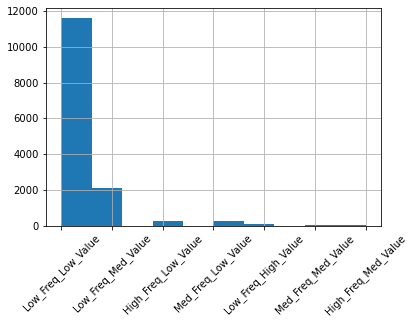

In [80]:
df2["Merch_Type"].hist(xrot=45)

### Step4 - Visualizing the merchant categories

In [81]:
df_final = df2.groupby(["Merch_Type"])["Merch_Type"].count()
df_final

Merch_Type
High_Freq_Low_Value      271
High_Freq_Med_Value        4
Low_Freq_High_Value       94
Low_Freq_Low_Value     11584
Low_Freq_Med_Value      2110
Med_Freq_Low_Value       272
Med_Freq_Med_Value        16
Name: Merch_Type, dtype: int64

In [82]:
dftest = df2.groupby(["Merch_Type"],as_index=False).count()

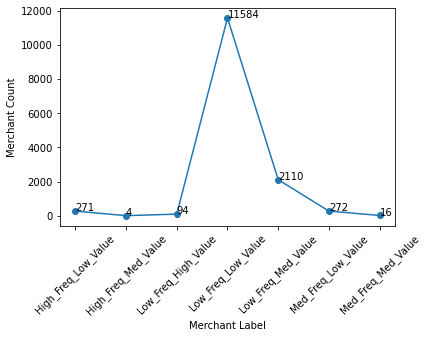

In [83]:
n = dftest["merchant"]

plt.scatter(dftest['Merch_Type'], dftest['merchant'])
plt.plot(dftest['Merch_Type'], dftest['merchant'])
plt.xlabel('Merchant Label')
plt.ylabel('Merchant Count')
plt.xticks(rotation=45)
plt.show

for i,v in enumerate(n):
    plt.annotate(v, (dftest['Merch_Type'][i],dftest['merchant'][i]))

In [84]:
c_names = ["Low Value", "Medium Value", "High Value"]
r_names = ["Low Frequency", "Medium Frequency", "High Frequency"]

matrx = np.reshape((11584,2110,94,272,16,0,271,4,0),(3,3))
df_num = pd.DataFrame(matrx,columns=c_names,index=r_names)
df_num

,Low Value,Medium Value,High Value
Low Frequency,11584,2110,94
Medium Frequency,272,16,0
High Frequency,271,4,0
